# Making effective plots in Python
other tutorials in this series show you how to make plots in python, and even how to customize those plots. Here we show you some best-practices for making plots that communicate your data in a powerful/effective way.
We'll start with the bad, and then show you the good.  We'll also cover some more technical topics like how to add LaTeX-formatted equations to your plots.

In [46]:
# numpy is the main Python array library
import numpy as np # "as np" allows us to use the abbreviation np for convenience

# we use matplotlib for plotting graphs
import matplotlib.pyplot as plt 
%matplotlib inline

# Our dataset
We start by generating some data that we'll be visualizing.

In [47]:
x  = np.arange(0, 10, 0.5)  # generate dummy data
y  = x**2
y += np.random.normal(loc=0, scale=3, size=x.size)  # add in gaussian noise

## First, the bad
The default plot parameters in matplotlib are not actually **that** terrible.

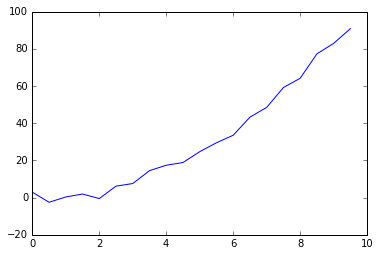

In [48]:
plt.plot(x, y)

## Getting better ...
Always ask yourself if color is really needed.  If there is a single dataset, the answer is generally, 'no'!  Black and white is often best.  Also, axes **must** be labeled (with units).  Data should be shown as points, saving lines for theoretical models or fits to the data.

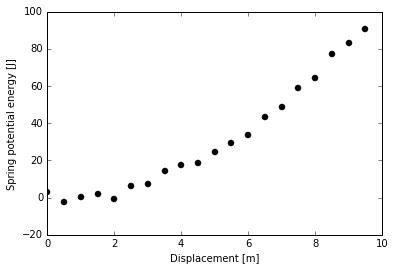

In [49]:
plt.plot(x, y, 'ko')  # plot with blac[k] filled circles [o]
plt.xlabel('Displacement [m]')
plt.ylabel('Spring potential energy [J]')

## Better still ...
OK, we're getting somewhere.  But the labels are quite small and hard to read, and notice that some of the points are rammed up against the edge of the plot.

(-10, 100)

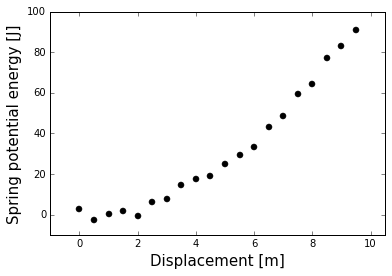

In [50]:
plt.plot(x, y, 'ko')  # plot with blac[k] filled circles [o]
fs = 15 # font size
plt.xlabel('Displacement [m]', fontsize=fs)
plt.ylabel('Spring potential energy [J]', fontsize=fs)
plt.xlim([min(x)-1, max(x)+1])
plt.ylim([-10,100])

## Quite good ...
Let's now fit a quadratic model to the data, and add a legend

       2
1.075 x - 0.4254 x - 0.1587


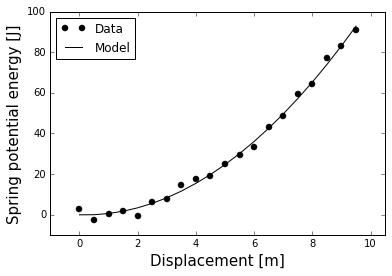

In [51]:
pfit = np.poly1d(np.polyfit(x, y, 2))

plt.plot(x, y, 'ko', label="Data")  # plot with blac[k] filled circles [o]
plt.plot(x, pfit(x), 'k-', label="Model")
fs = 15 # font size
plt.xlabel('Displacement [m]', fontsize=fs)
plt.ylabel('Spring potential energy [J]', fontsize=fs)
plt.xlim([min(x)-1, max(x)+1])
plt.ylim([-10,100])
plt.legend(loc="upper left")
print pfit

## Icing on the cake
We can overlay the analytic expression for the best-fit function on the plot.  Also, notice that we can use LaTeX syntax by enclosing our label in dollar signs.

In [ ]:
label = "$U(x) = %4.1fx^2 %+6.4f x %+6.4f$" % (pfit[0], pfit[1], pfit[2])
plt.plot(x, y, 'ko', label="Data")  # plot with blac[k] filled circles [o]
plt.plot(x, pfit(x), 'k-', label="Model")
plt.text(0, 60, label, fontsize=13)
fs = 15 # font size
plt.xlabel('Displacement [m]', fontsize=fs)
plt.ylabel('Spring potential energy [J]', fontsize=fs)
plt.xlim([min(x)-1, max(x)+1])
plt.ylim([-10,100])
plt.legend(loc="upper left")
print pfit

# Future work
Larger tick label font